# Pipeline_GridSearchCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [3]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

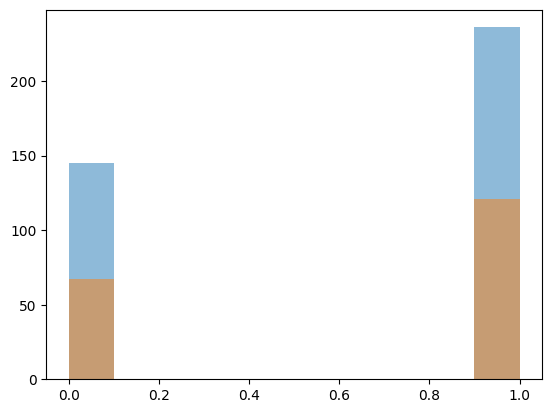

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [6]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

In [8]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [9]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

In [10]:
len(results.mean_test_score)

72

TypeError: Only length-1 arrays can be converted to Python scalars

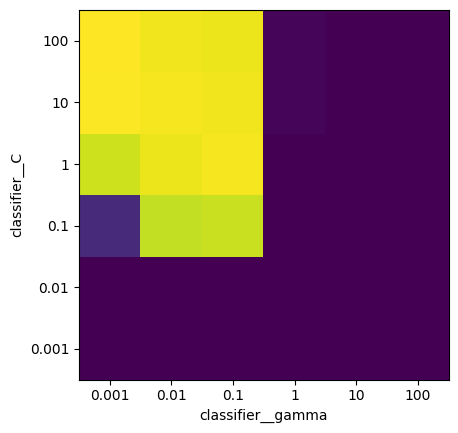

In [11]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [31]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9834710743801653
recall_score: 0.9834710743801653
f1_score: 0.9834710743801653
accuracy_score: 0.9787234042553191


In [32]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.983471,0.983471,0.983471,0.978723


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression


models = {
    "SVM_rbf": SVC(kernel="rbf"),
    "SVM_Poly": SVC(kernel="poly"),
    "SVM_Linear": LinearSVC(dual=False, max_iter=10000),
    "Logistic_Regression": LogisticRegression(),
}

param_grids_corrected = {
    "SVM_rbf": {"svm_rbf__C": [0.1, 1, 10], "svm_rbf__gamma": [0.1, 1, 10]},
    "SVM_Poly": {"svm_poly__C": [0.1, 1, 10], "svm_poly__degree": [2, 3, 4]},
    "SVM_Linear": {"svm_linear__C": [0.1, 1, 10]},
    "Logistic_Regression": {"logistic_regression__C": [0.1, 1, 10]},
}

best_models_corrected = {}

for model_name, model in models.items():
    pipeline_corrected = Pipeline(
        [("scaler", StandardScaler()), (model_name.lower(), model)]
    )
    grid_search_corrected = GridSearchCV(
        pipeline_corrected, param_grids_corrected[model_name], cv=5, scoring="accuracy"
    )
    grid_search_corrected.fit(X_train, y_train)
    best_models_corrected[model_name] = grid_search_corrected.best_estimator_

    

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

models = {
    "SVM_rbf": SVC(kernel="rbf"),
    "SVM_Poly": SVC(kernel="poly"),
    "SVM_Linear": LinearSVC(max_iter=10000),
    "Logistic_Regression": LogisticRegression(),
}

param_grids = {
    "SVM_rbf": {"svm_rbf__C": [0.1, 1, 10], "svm_rbf__gamma": [0.1, 1, 10]},
    "SVM_Poly": {
        "svm_poly__C": [0.1, 1, 10],
        "svm_poly__degree": [2, 3, 4],
        "svm_poly__gamma": [0.1, 1, 10],
    },
    "SVM_Linear": {"svm_linear__C": [0.1, 1, 10]},
    "Logistic_Regression": {"logistic_regression__C": [0.1, 1, 10]},
}


from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

best_models = {}

for model_name, model in models.items():
    pipeline = Pipeline([("scaler", StandardScaler()), (model_name.lower(), model)])
    grid_search = GridSearchCV(
        pipeline, param_grids[model_name.replace(" ", "_")], cv=5, scoring="accuracy"
    )
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Najlepszy model dla {model_name}:")
    print(grid_search.best_params_)
    print("Skuteczność: ", grid_search.best_score_)


for name, model in best_models.items():
    print(f"Wyniki dla {name}:")
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

Najlepszy model dla SVM_rbf:
{'svm_rbf__C': 1, 'svm_rbf__gamma': 0.1}
Skuteczność:  0.95
Najlepszy model dla SVM_Poly:
{'svm_poly__C': 0.1, 'svm_poly__degree': 3, 'svm_poly__gamma': 1}
Skuteczność:  0.9416666666666668
Najlepszy model dla SVM_Linear:
{'svm_linear__C': 10}
Skuteczność:  0.9583333333333334
Najlepszy model dla Logistic_Regression:
{'logistic_regression__C': 1}
Skuteczność:  0.9583333333333334
Wyniki dla SVM_rbf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Wyniki dla SVM_Poly:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
      

/home/sit3kk/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sit3kk/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sit3kk/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sit3kk/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sit3kk/.local/lib/python3.12/s